In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /Users/medha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/medha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
trueNews = pd.read_csv('True.csv')
trueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fakeNews = pd.read_csv('Fake.csv')
fakeNews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#checking number of rows per dataset
trows = len(trueNews.axes[0])
frows = len(fakeNews.axes[0])
print(trows, frows)

21417 23481


In [8]:
#creating a label column where 1 = true news and 0 = fake news
trueNews['validity'] = 1 
fakeNews['validity'] = 0

In [9]:
#joining both data sets together
df = pd.DataFrame()
df = trueNews.append(fakeNews)
df

,title,text,subject,date,validity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


### Some Data Visualization:

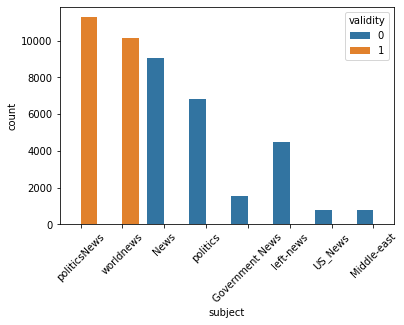

In [10]:
sns.countplot(df['subject'],hue='validity',data=df)
plt.xticks(rotation=45);

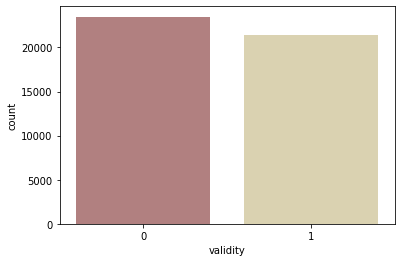

In [11]:
sns.countplot(df['validity'],data=df,palette='pink');

### Data Cleaning:

In [12]:
#removing unwanted columns 

df=df.drop(columns=['subject','date'], axis=1)
df.head()

,title,text,validity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [13]:
#removing null values
df.isnull().sum()


title       0
text        0
validity    0
dtype: int64

In [14]:
def cleaning(text):
    text = text.lower() #converts texts into lower case
    text = re.sub('[^a-zA-Z]', '', text) #removes all special characters and numbers from text
    token = text.split()
    
    news = [ps.lemmatize(word) for word in token if not word in stopwords]
    #lemmatize -> bark, barks, barking = bark
    #stop words = a, an, the, is, are...
    
    cleaned_news = ' '.join(news)
    
    return cleaned_news
    

### Natural Language Processing:

In [15]:
nlp = df
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to /Users/medha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

In [17]:
nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

In [18]:
from nltk.corpus import stopwords 

nltk.download('words')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package words to /Users/medha/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/medha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(nlp['title'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['validity'], test_size=0.33, random_state=1)

## Linear SVC

In [21]:
scores = {}

In [22]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = LinearSVC(max_iter=100, C=1.0)
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)
print(cross_val_score(clf, X_text, nlp['validity'], cv=3))
print(accuracy_score(y_pred_SVM, y_test))

scores['LinearSVC'] = accuracy_score(y_pred_SVM, y_test)

[0.91146599 0.93097688 0.92790325]
0.9600458932307485


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

/Users/medha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred_lr=lr_model.predict(X_test)
y_pred_lr

array([1, 0, 1, ..., 1, 0, 1])

In [25]:
accuracy_score(y_pred_lr,y_test)

0.9516096375784572

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_pred_rfc=rfc_model.predict(X_test)
y_pred_rfc

array([1, 0, 1, ..., 1, 0, 1])

In [28]:
accuracy_score(y_test,y_pred_rfc)

0.9491799959505973

## Checking True or Fake

In [1]:
def checking_our_value():
    
    
    x=X_train[100]
    
    print('Linear SVC: ',output(clf.predict(x)))
    print('Logistic Regression: ',output(lr_model.predict(x)))
    print('Random Forest Classifier: ',output(rfc_model.predict(x)))
    
def output(n):
    
    if n==1:
        
        return 'True News'
        
    else:
         return 'Fake News'

In [2]:
checking_our_value()

NameError: name 'X_train' is not defined